X_train_1.shape,Y_train.shape
(1075, 276, 15) (1075, 276)
X_test_1.shape,Y_test.shape
(355, 276, 15) (355, 276)
Y_test_original.shape
(355, 276)
4744 0
(1075, 276, 15)
(355, 276, 15)
finish compile
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0203

W0000 00:00:1718098827.879573     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718098827.880581     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0193
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0113
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0089
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0080
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050
Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027
Epoch 6/10
17/17 ━━━

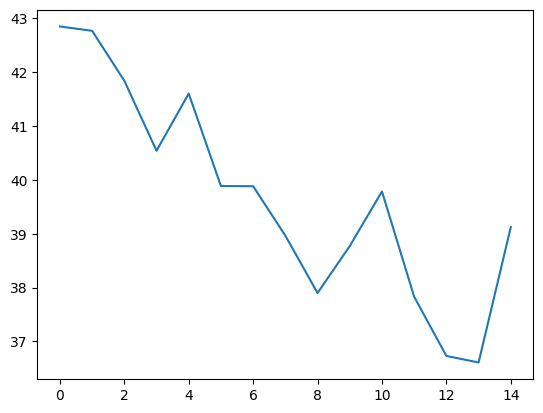

Total training time:  90.08660531044006


In [12]:
# """**************************************************LOAD_DATA.PY**************************************************"""

from numpy.random import seed
seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
np.set_printoptions(threshold=np.inf)
import time
import csv

global_start_time = time.time()
def Get_All_Data(TG,time_lag,TG_in_one_day,forecast_day_number,TG_in_one_week):
	# deal with inflow data 处理进站数据
	metro_enter = []
	with open('/kaggle/input/datagcn/data/inflowdata/in_'+str(TG)+'min.csv') as f:
		data = csv.reader(f, delimiter=",")
		for line in data:
			line=[int(x) for x in line]
			metro_enter.append(line)

	def get_train_data_enter(data,time_lag,TG_in_one_day,forecast_day_number,TG_in_one_week):
		data=np.array(data)
		data2=np.zeros((data.shape[0],data.shape[1]))
		a=np.max(data)
		b=np.min(data)
		for i in range(len(data)):
			for j in range(len(data[0])):
				data2[i,j]=round((data[i,j]-b)/(a-b),5)
		# 不包括第一周和最后一周的数据
		# not include the first week and the last week among the five weeks
		X_train_1 = [[] for i in range(TG_in_one_week, len(data2[0]) - time_lag+1 - TG_in_one_day*forecast_day_number)]
		Y_train = []
		for index in range(TG_in_one_week, len(data2[0]) - time_lag+1 - TG_in_one_day*forecast_day_number):
			for i in range(276):
				temp=data2[i,index-TG_in_one_week: index + time_lag-1-TG_in_one_week].tolist()
				temp.extend(data2[i,index-TG_in_one_day: index + time_lag-1-TG_in_one_day])
				temp.extend(data2[i,index: index + time_lag-1])
				X_train_1[index-TG_in_one_week].append(temp)
			Y_train.append(data2[:,index + time_lag-1])
		X_train_1,Y_train = np.array(X_train_1), np.array(Y_train)
		print("X_train_1.shape,Y_train.shape")
		print(X_train_1.shape,Y_train.shape)

		X_test_1 = [[] for i in range(len(data2[0]) - TG_in_one_day*forecast_day_number,len(data2[0])-time_lag+1)]
		Y_test = []
		for index in range(len(data2[0]) - TG_in_one_day*forecast_day_number,len(data2[0])-time_lag+1):
			for i in range(276):
				temp=data2[i,index-TG_in_one_week: index + time_lag-1-TG_in_one_week].tolist()
				temp.extend(data2[i,index-TG_in_one_day: index + time_lag-1-TG_in_one_day])
				temp.extend(data2[i,index: index + time_lag-1])
				X_test_1[index-(len(data2[0]) - TG_in_one_day*forecast_day_number)].append(temp)
			Y_test.append(data2[:,index + time_lag-1])
		X_test_1,Y_test = np.array(X_test_1), np.array(Y_test)
		print("X_test_1.shape,Y_test.shape")
		print(X_test_1.shape,Y_test.shape)

		Y_test_original = []
		for index in range(len(data[0]) - TG_in_one_day*forecast_day_number,len(data[0])-time_lag+1):
			Y_test_original.append(data[:,index + time_lag-1])
		Y_test_original = np.array(Y_test_original)
		print("Y_test_original.shape")
		print(Y_test_original.shape)

		return X_train_1,Y_train,X_test_1,Y_test,Y_test_original,a,b

	#获取训练集和测试集，Y_test_original为没有scale之前的原始测试集，评估精度用，a,b分别为最大值和最小值
	#Get the training dataset and the test dataset, Y_test_original is the original test data before scaling, which can be used for evaluation.
	#a and b as the maximum and minimum values, respectively.
	X_train_1,Y_train,X_test_1,Y_test,Y_test_original,a,b=get_train_data_enter(metro_enter,time_lag,TG_in_one_day,forecast_day_number,TG_in_one_week)
	print(a,b)

	#deal with outflow data. Similar with the inflow data while not including the testing data for outflow
	#处理出站数据
	metro_exit = []
	with open('/kaggle/input/datagcn/data/outflowdata/out_'+str(TG)+'min.csv') as f:
		data = csv.reader(f, delimiter=",")
		for line in data:
			line=[int(x) for x in line]
			metro_exit.append(line)

	def get_train_data_exit(data,time_lag,TG_in_one_day,forecast_day_number,TG_in_one_week):
		data=np.array(data)
		data2=np.zeros((data.shape[0],data.shape[1]))
		a=np.max(data)
		b=np.min(data)
		for i in range(len(data)):
			for j in range(len(data[0])):
				data2[i,j]=round((data[i,j]-b)/(a-b),5)
		#不包括第一周和最后一周
		## not include the first week and the last week among the five weeks
		X_train_1 = [[] for i in range(TG_in_one_week, len(data2[0]) - time_lag+1 - TG_in_one_day*forecast_day_number)]
		for index in range(TG_in_one_week, len(data2[0]) - time_lag+1 - TG_in_one_day*forecast_day_number):
			for i in range(276):
				temp=data2[i,index-TG_in_one_week: index + time_lag-1-TG_in_one_week].tolist()#上周同一个时间段的数据
				temp.extend(data2[i,index-TG_in_one_day: index + time_lag-1-TG_in_one_day])#前一天同一个时间段的数据
				temp.extend(data2[i,index: index + time_lag-1])#当天前几个时间段的数据
				X_train_1[index-TG_in_one_week].append(temp)
		X_train_1= np.array(X_train_1)
		print(X_train_1.shape)#其形状应该是(sample number, 276, 5, channel=3),3代表着上一周，前一天，当天，相当于275*5*3的图片

		X_test_1 = [[] for i in range(len(data2[0]) - TG_in_one_day*forecast_day_number,len(data2[0])-time_lag+1)]
		for index in range(len(data2[0]) - TG_in_one_day*forecast_day_number,len(data2[0])-time_lag+1):
			#此处注意test的下标要从0开始，而data2_all的下标要从
			for i in range(276):
				temp=data2[i,index-TG_in_one_week: index + time_lag-1-TG_in_one_week].tolist()
				temp.extend(data2[i,index-TG_in_one_day: index + time_lag-1-TG_in_one_day])
				temp.extend(data2[i,index: index + time_lag-1])
				X_test_1[index-(len(data2[0]) - TG_in_one_day*forecast_day_number)].append(temp)
		X_test_1= np.array(X_test_1)
		print(X_test_1.shape)
		return X_train_1,X_test_1

	X_train_2,X_test_2=get_train_data_exit(metro_exit,time_lag,TG_in_one_day,forecast_day_number,TG_in_one_week)


	return X_train_1,Y_train,X_test_1,Y_test,Y_test_original,a,b,X_train_2,X_test_2

"""**************************************************UTILS.PY**************************************************"""

import tensorflow as tf
import scipy.sparse as sp
import numpy as np

def normalized_adj(adj):
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    normalized_adj = adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()
    normalized_adj = normalized_adj.astype(np.float32)
    return normalized_adj

def sparse_to_tuple(mx):
    """Convert sparse matrix to tuple representation for TensorFlow."""
    if not sp.isspmatrix_coo(mx):
        mx = mx.tocoo()
    coords = np.vstack((mx.row, mx.col)).transpose()
    values = mx.data
    shape = mx.shape
    return tf.sparse.SparseTensor(coords, values, shape)

def calculate_laplacian(adj, lambda_max=2):
    """Calculate the Laplacian and return as a sparse tensor."""
    normalized_adj_matrix = normalized_adj(adj)
    laplacian = sp.eye(normalized_adj_matrix.shape[0]) - normalized_adj_matrix
    return sparse_to_tuple(laplacian)

def weight_variable_glorot(input_dim, output_dim, name=""):
    """Initialize weights using Glorot (Xavier) initialization."""
    init_range = np.sqrt(6.0 / (input_dim + output_dim))
    initial = tf.random.uniform([input_dim, output_dim], minval=-init_range,
                                maxval=init_range, dtype=tf.float32)
    return tf.Variable(initial, name=name)


"""**************************************************METRICS.PY**************************************************"""


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
import numpy as np


def weighted_mean_absolute_percentage_error(Y_true, Y_pred):
	# (n * 276)
	total_sum=np.sum(Y_true)
	average=[]
	for i in range(len(Y_true)):
		for j in range(len(Y_true[0])):
			if Y_true[i][j]>0:
				temp=(Y_true[i][j]/total_sum)*np.abs((Y_true[i][j] - Y_pred[i][j]) / Y_true[i][j])
				average.append(temp)
	return np.sum(average)

def evaluate_performance(Y_test_original,predictions):
	RMSE = sqrt(mean_squared_error(Y_test_original, predictions))
	print('RMSE is '+str(RMSE))
	R2 = r2_score(Y_test_original,predictions)
	print("R2 is："+str(R2))
	MAE=mean_absolute_error(Y_test_original, predictions)
	print("MAE is："+str(MAE))
	WMAPE=weighted_mean_absolute_percentage_error(Y_test_original,predictions)
	print("WMAPE is "+str(WMAPE))
	return RMSE,R2,MAE,WMAPE


"""**************************************************MODIFYGCNLAYER.PY**************************************************"""

import tensorflow as tf
from tensorflow.keras import activations, initializers, constraints, regularizers
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class GraphConvolution1(Layer):
    def __init__(self, units, support=1,
                 activation=None,
                 use_bias=True,
                 adj = None,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(GraphConvolution1, self).__init__(**kwargs)
        self.adj1 = calculate_laplacian(adj)
        self.adj = tf.sparse.to_dense(self.adj1)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.supports_masking = True

        self.support = support
        # assert support >= 1



    def compute_output_shape(self, input_shapes):
        # features_shape = input_shapes[0]
        output_shape = (None, input_shapes[1], self.units)
        return output_shape  # (batch_size, output_dim)

    def build(self, input_shapes):
        # features_shape = input_shapes[0]#<tf.Tensor 'input_2:0' shape=(?, 276) dtype=float32>

        input_dim = input_shapes[2] # 14
        self.kernel = self.add_weight(shape=(input_dim * self.support,#（15*1,14）（14*1,1）
                                             self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.built = True

    def call(self, inputs, mask=None):
        supports = K.dot(tf.cast(self.adj, dtype=inputs.dtype), inputs)
        supports = tf.transpose(supports, perm=[1, 0, 2])
        output = K.dot(supports, self.kernel)
        if self.bias is not None:  # Check if bias is not None
            output += self.bias
        return self.activation(output)

    def get_config(self):
        config = {'units': self.units,
                  'support': self.support,
                  'activation': activations.serialize(self.activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer': initializers.serialize(
                      self.kernel_initializer),
                  'bias_initializer': initializers.serialize(
                      self.bias_initializer),
                  'kernel_regularizer': regularizers.serialize(
                      self.kernel_regularizer),
                  'bias_regularizer': regularizers.serialize(
                      self.bias_regularizer),
                  'activity_regularizer': regularizers.serialize(
                      self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(
                      self.kernel_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint)
        }

        base_config = super(GraphConvolution1, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))





"""**************************************************CONV_GCN.PY**************************************************"""

import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Conv3D, Dense, Flatten, concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import time

# Set matplotlib backend
%matplotlib inline
begintime = time.time()

X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2 =  Get_All_Data(TG=15, time_lag=6, TG_in_one_day=72, forecast_day_number=5, TG_in_one_week=360)
adjacency = []
with open('/kaggle/input/datagcn/data/adjacency.csv') as f:
    data = csv.reader(f, delimiter=",")
    for line in data:
        line=[float(x) for x in line]
        adjacency.append(line)
adjacency = np.array(adjacency)


# X_train_1,X_test_1 enter data

input1 = Input(shape=(X_train_1.shape[1],X_train_1.shape[2]))
out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

# X_train_2,X_test_2 exit data
input2 = Input(shape=(X_train_2.shape[1],X_train_2.shape[2]), name='input2')
out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

out = tf.keras.layers.concatenate([out1, out2], axis=4)

out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)

out = Flatten()(out)
out = Dense(276)(out)

model = Model(inputs=[input1, input2], outputs=[out])


# plot_model(model, to_file='model.png',show_shapes=True)
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
print("finish compile")


def fit10():
    #model.load('my_model_weights.keras')
    model.fit([X_train_1,X_train_2], Y_train, batch_size=64, epochs=10, verbose=1) # callbacks=callbacks,validation_split=0.2)
    Y_test_pre = model.predict([X_test_1,X_test_2], verbose=1)
    Y_test_pre = Y_test_pre.reshape(-1,276)
    Y_test_pre = Y_test_pre * a   # a = 8940 when TG = 30 min，a = 4744 when TG = 15 min
    model.save('my_model_weights.keras')
    return evaluate_performance(Y_test_original,Y_test_pre)#


model.fit([X_train_1,X_train_2], Y_train, batch_size=64, epochs=10, verbose=1) # callbacks=callbacks,validation_split=0.2)
model.save('my_model_weights.keras')

RMSEs = []
R2s = []
MAEs = []
WMAPEs = []
epochNum = 15
for i in range(epochNum):
    RMSE, R2, MAE, WMAPE = fit10()
    RMSEs.append(RMSE)
    R2s.append(R2)
    MAEs.append(MAE)
    WMAPEs.append(WMAPE)
plt.plot(RMSEs)

print("\n")
minindex=RMSEs.index(min(RMSEs))
print("RMSEs.index(min(RMSEs))", minindex)
print("min(RMSEs))", RMSEs[minindex])
print("min(MAEs))", MAEs[minindex])
print("min(WMAPEs))", WMAPEs[minindex])

print("\n")
minindex=MAEs.index(min(MAEs))
print("MAEs.index(min(MAEs))", minindex)
print("min(RMSEs))", RMSEs[minindex])
print("min(MAEs))", MAEs[minindex])
print("min(WMAPEs))", WMAPEs[minindex])

print("\n")
minindex=WMAPEs.index(min(WMAPEs))
print("WMAPEs.index(min(WMAPEs))", minindex)
print("min(RMSEs))", RMSEs[minindex])
print("min(MAEs))", MAEs[minindex])
print("min(WMAPEs))", WMAPEs[minindex])

plt.savefig('books_read.png')
plt.show()

totaltime=time.time()-begintime
print("Total training time: ", totaltime)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


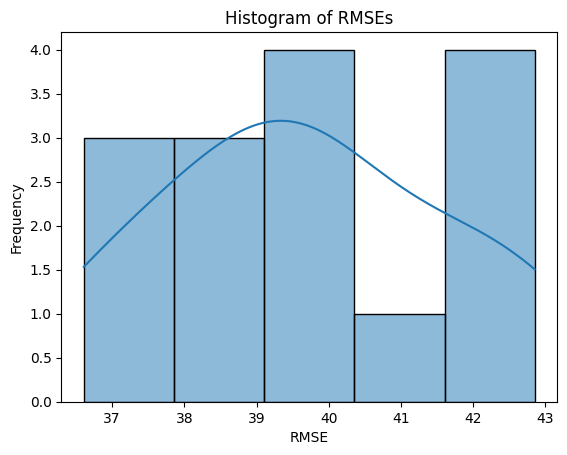

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


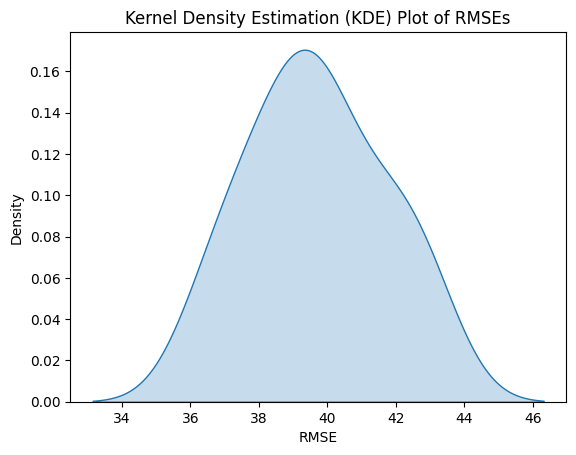

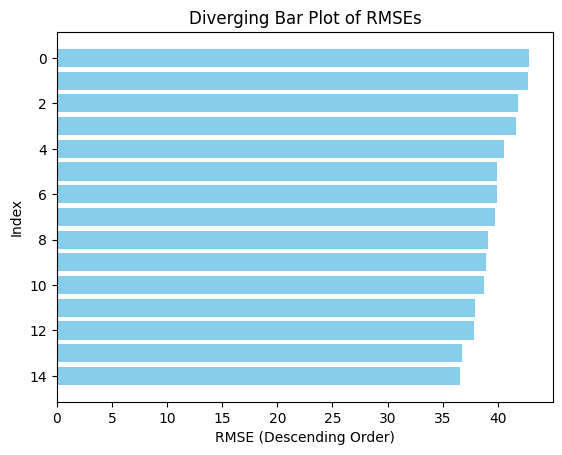

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Histogram
sns.histplot(RMSEs, kde=True)
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('Histogram of RMSEs')
plt.show()

# Kernel Density Estimation (KDE) Plot
sns.kdeplot(RMSEs, fill=True)
plt.xlabel('RMSE')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of RMSEs')
plt.show()


#Diverging Bar Plot
sorted_RMSEs_descending = np.sort(RMSEs)[::-1]

plt.barh(range(len(sorted_RMSEs_descending)), sorted_RMSEs_descending, color='skyblue')
plt.xlabel('RMSE (Descending Order)')
plt.ylabel('Index')
plt.title('Diverging Bar Plot of RMSEs')
plt.gca().invert_yaxis()  # Invert y-axis to show descending trend
plt.show()
